# Disorder maps

In [1]:
# Import modules and R
import numpy as np, pandas as pd
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

In [2]:
import sys, os
sys.path.append('../code')
from processing_helpers import *
from analysis_helpers import *
from mri_maps import *
from gradientVersion import *
%R source("../code/Rplots.R");
%R source("../code/brainPlots.R");
%R source("../code/plot_maps.R");

/opt/conda/lib/python3.8/site-packages/nilearn/datasets/__init__.py:93: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  warn("Fetchers from the nilearn.datasets module will be "


## Make distance matrix for DK atlas

In [ ]:
# from brainsmash.workbench.geo import parcellate
# infile = "/home/rajd2/rds/rds-cam-psych-transc-Pb9UGUlrwWc/Cam_LIBD/AHBA_data/LeftDenseGeodesicDistmat.txt"
# outfile = "../data/LeftParcelGeodesicDistmat_DK.txt"
# dlabel = "../data/fsaverage.aparc.32k_fs_L.dlabel.nii"
# parcellate(infile, dlabel, outfile)

---

In [3]:
maps = get_disorder_maps().drop(['ADHD', 'ANX', 'MCI'], axis=1)
maps.head()

,AD,ASD,MDD,SCZ
region,,,,
lh_bankssts,-1.241970,-0.265312,0.389026,0.405498
lh_caudalanteriorcingulate,0.849102,-1.870202,2.660308,1.430681
lh_caudalmiddlefrontal,0.304156,-1.538156,-0.011789,0.051987
lh_cuneus,1.837609,0.841510,-2.149466,0.829712
lh_entorhinal,-1.964341,-1.040086,-0.011789,1.218574


In [4]:
dm_dk_ds9 = gradientVersion(approach='dm', kernel='normalized_angle', alpha=1).fit('dk_ds9')
pca_dk_ds9 = gradientVersion(approach='pca').fit('dk_ds9')
# pca_dk_ds9 = gradientVersion(approach='pca').fit('dk_ds8')
scores = pca_dk_ds9.clean_scores().iloc[:,:3].rename_axis('region')

New gradients version: method=dm, kernel=normalized_angle, data=dk_ds9
New gradients version: method=pca, kernel=None, data=dk_ds9


In [5]:
get_corrs(scores, maps, atlas='dk')

,G1,G2,G3
AD,0.563783,0.149937,0.541651
ASD,0.511490,-0.085461,-0.096289
MDD,-0.310306,0.040844,0.277454
SCZ,-0.001959,-0.358961,0.376234


In [6]:
# generate_spins(maps, n=10000, outfile="../outputs/spin_disorders_10000.npy", atlas='dk')
# generate_spins_from_gradients(scores, n=10000, outfile='../outputs/spin_gradients_dk_10000.npy', atlas='dk')
generate_spins_from_gradients(scores, n=1000, outfile='../outputs/spin_gradients_dk_pca_1000.npy', atlas='dk')

# generate_simulations(maps, n=10000, outfile='../outputs/sim_disorders_dk_10000.npy', atlas='dk')
# generate_simulations(scores, n=10000, outfile='../outputs/sim_gradients_dk_10000.npy', atlas='dk')
generate_simulations(scores, n=1000, outfile='../outputs/sim_gradients_dk_pca_1000.npy', atlas='dk')


In [7]:
spin_maps = np.load("../outputs/spin_disorders_10000.npy")
# spin_grads = np.load("../outputs/spin_gradients_dk_10000.npy")
spin_grads = np.load("../outputs/spin_gradients_dk_pca_1000.npy")
sim_maps = np.load("../outputs/sim_disorders_dk_10000.npy")
# sim_grads = np.load("../outputs/sim_gradients_dk_10000.npy")
sim_grads = np.load("../outputs/sim_gradients_dk_pca_1000.npy")

In [8]:
null_corrs_dict = {}
null_corrs_dict['spin_maps_p'] = corr_nulls_from_maps(spin_maps, scores, maps, method='pearson')
null_corrs_dict['spin_maps_p_pool'] = corr_nulls_from_maps(spin_maps, scores, maps, method='pearson', pool=True)
null_corrs_dict['spin_grads_p'] = corr_nulls_from_grads(spin_grads, scores, maps, method='pearson')
null_corrs_dict['spin_grads_p_pool'] = corr_nulls_from_grads(spin_grads, scores, maps, method='pearson', pool=True, pool_frac=1)
# save_pickle(null_corrs_dict, 'null_corrs_dict_disorders')

null_corrs_dict['sim_maps_p'] = corr_nulls_from_maps(sim_maps, scores, maps, method='pearson')
null_corrs_dict['sim_maps_p_pool'] = corr_nulls_from_maps(sim_maps, scores, maps, method='pearson', pool=True)
null_corrs_dict['sim_grads_p'] = corr_nulls_from_grads(sim_grads, scores, maps, method='pearson')
null_corrs_dict['sim_grads_p_pool'] = corr_nulls_from_grads(sim_grads, scores, maps, method='pearson', pool=True, pool_frac=1)
# save_pickle(null_corrs_dict, 'null_corrs_dict_disorders')

# null_corrs_dict['spin_maps_s'] = corr_nulls_from_maps(spin_maps, scores, maps, method='spearman')
# null_corrs_dict['spin_maps_s_pool'] = corr_nulls_from_maps(spin_maps, scores, maps, method='spearman', pool=True)
# null_corrs_dict['spin_grads_s'] = corr_nulls_from_grads(spin_grads, scores, maps, method='spearman')
# null_corrs_dict['spin_grads_s_pool'] = corr_nulls_from_grads(spin_grads, scores, maps, method='spearman', pool=True)
# save_pickle(null_corrs_dict, 'null_corrs_dict_disorders')

# null_corrs_dict['sim_maps_s'] = corr_nulls_from_maps(sim_maps, scores, maps, method='spearman')
# null_corrs_dict['sim_maps_s_pool'] = corr_nulls_from_maps(sim_maps, scores, maps, method='spearman', pool=True)
# null_corrs_dict['sim_grads_s'] = corr_nulls_from_grads(sim_grads, scores, maps, method='spearman')
# null_corrs_dict['sim_grads_s_pool'] = corr_nulls_from_grads(sim_grads, scores, maps, method='spearman', pool=True)    
# save_pickle(null_corrs_dict, 'null_corrs_dict_disorders')

In [9]:
# save_pickle(null_corrs_dict, 'null_corrs_dict_disorders')
save_pickle(null_corrs_dict, 'null_corrs_dict_disorders_pca')
# null_corrs_dict = load_pickle('null_corrs_dict_disorders')

In [10]:
corrs = get_corrs(scores, maps, atlas='dk')
corr_versions = {version:get_null_p(corrs, null_corrs, adjust='fdr_bh') 
                 for version, null_corrs in null_corrs_dict.items()}
corr_versions = pd.concat(corr_versions).reset_index(0).rename({'level_0':'version'},axis=1)

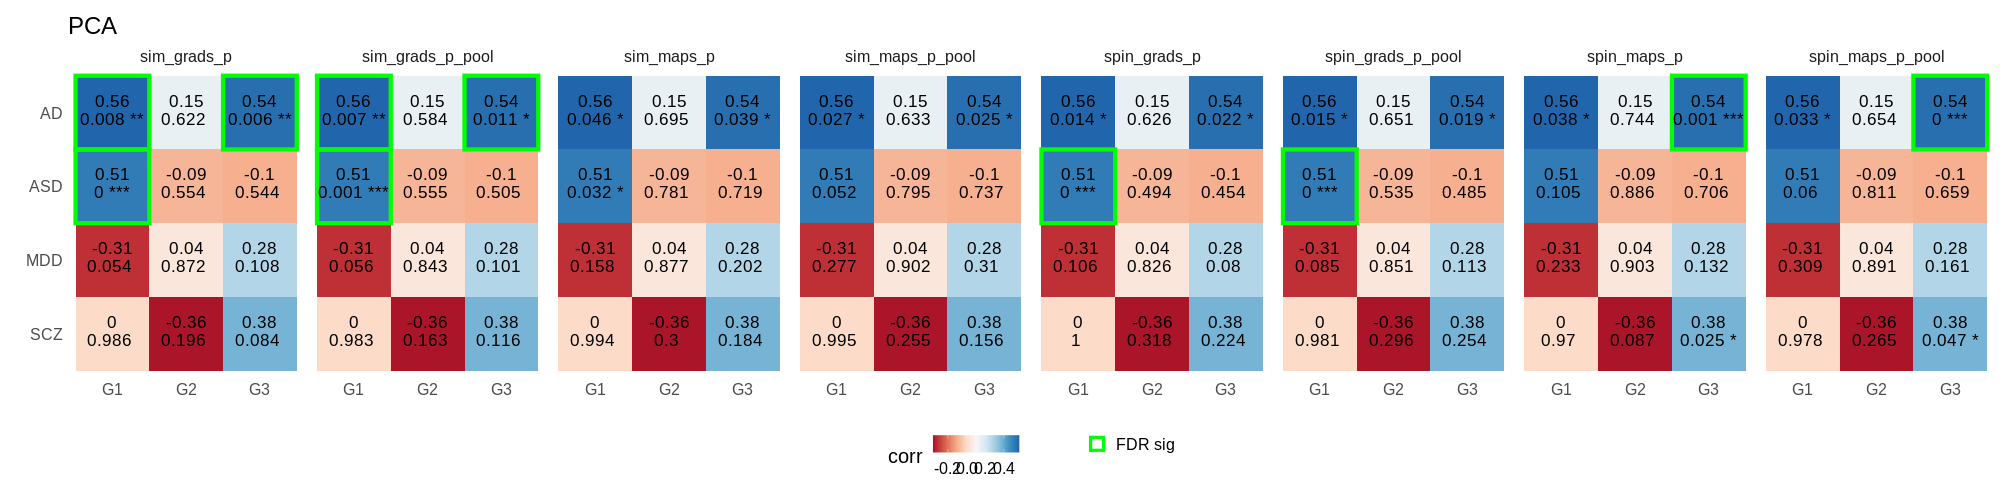

In [12]:
%%R -i corr_versions -w 2000 -h 500
source("../code/plot_maps.R")
plot_corr_versions(corr_versions) + ggtitle('PCA')

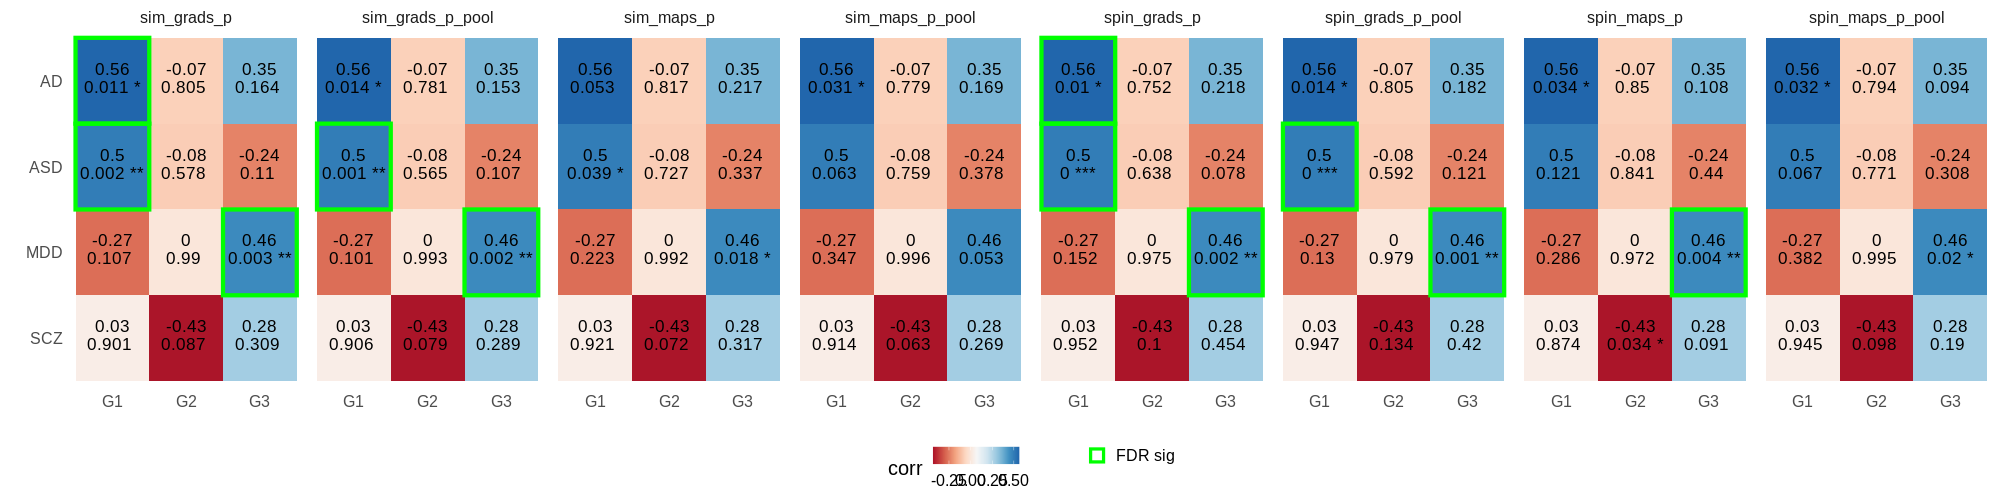

In [15]:
%%R -i corr_versions -w 2000 -h 500
source("../code/plot_maps.R")
plot_corr_versions(corr_versions)

In [29]:
scores_plot = scores.join(get_labels_dk())
corrs = get_corrs(scores, maps, atlas='dk')
null_corrs = null_corrs_dict['sim_maps_p_pool']
null_p = get_null_p(corrs, null_corrs, adjust=None)
null_p

,map,G,pct,true_mean,null_mean,null_std,z,pos,p,sig
0,AD,G1,0.984571,0.561955,-0.001798,0.273472,2.061460,True,0.030857,True
1,AD,G2,0.390143,-0.074290,-0.001587,0.236339,-0.307620,False,0.780286,False
2,AD,G3,0.915571,0.354749,-0.002021,0.246436,1.447714,True,0.168857,False
3,ASD,G1,0.968571,0.499058,-0.001798,0.273472,1.831468,True,0.062857,False
4,ASD,G2,0.379286,-0.082120,-0.001587,0.236339,-0.340750,False,0.758571,False
5,ASD,G3,0.188571,-0.235776,-0.002021,0.246436,-0.948540,False,0.377143,False
6,MDD,G1,0.173429,-0.273075,-0.001798,0.273472,-0.991972,False,0.346857,False
7,MDD,G2,0.501714,-0.003607,-0.001587,0.236339,-0.008547,True,0.996571,False
8,MDD,G3,0.974143,0.464127,-0.002021,0.246436,1.891554,True,0.051714,False
9,SCZ,G1,0.542857,0.029388,-0.001798,0.273472,0.114035,True,0.914286,False


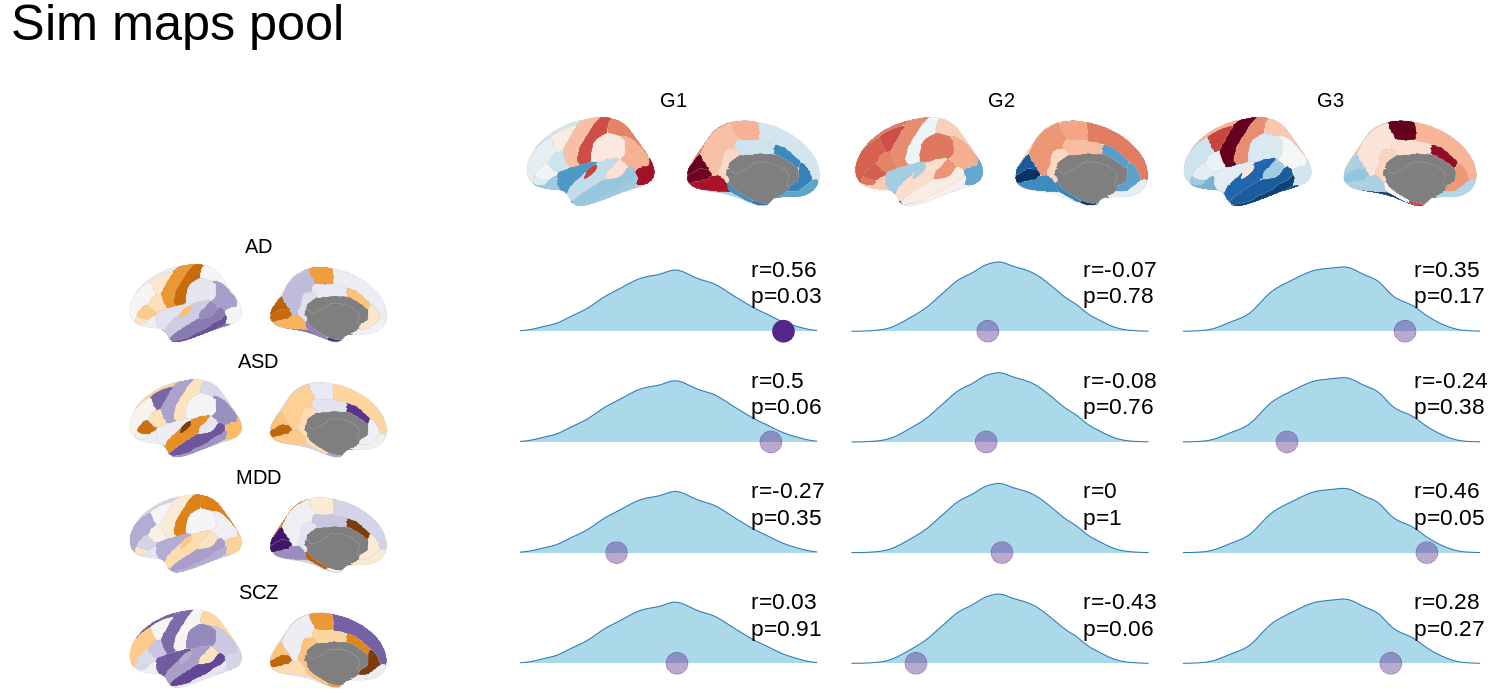

In [30]:
%%R -i corrs -i null_corrs -i null_p -i scores_plot -i maps -w 1500 -h 700
source("../code/plot_maps.R")
source("../code/brainPlots.R")
g1 <- plot_null_corrs(corrs, null_corrs, null_p)
g2 <- plot_dk_wide(scores_plot, spacing=0) + guides(fill='none')
g3 <- plot_maps_dk(maps, colors=rev(brewer.puor(100)), ncol=1) + guides(fill='none')

(
    ((plot_spacer() | g2) + plot_layout(widths=c(1,2))) / 
    ((g3 | g1) + plot_layout(widths=c(1,2)))
) + plot_layout(heights=c(1,4)) + plot_annotation(title='Sim maps pool', 
                                                  theme=theme(title=element_text(size=42)))